<a href="https://colab.research.google.com/github/vanshikamandala/advcod/blob/main/ml_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1) (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile("/content/archive (1).zip", "r") as zip_ref:
    zip_ref.extractall("news_data")


In [ ]:
import pandas as pd

real = pd.read_csv("news_data/True.csv")
fake = pd.read_csv("news_data/Fake.csv")


In [ ]:
real['label'] = 1
fake['label'] = 0

df = pd.concat([real, fake]).sample(frac=1).reset_index(drop=True)


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [ ]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned'] = df['text'].apply(clean_text)


In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned']).toarray()
y = df['label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4688
           1       0.98      0.99      0.99      4250

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

[[4621   67]
 [  46 4204]]


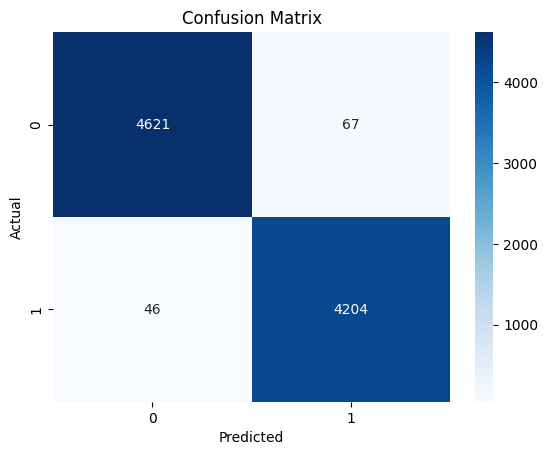

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
# app.py
import streamlit as st
import joblib

# Load model and vectorizer
model = joblib.load('fake_news_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Text cleaning function (same one used during training)
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Streamlit UI
st.title("📰 Fake News Detector")

user_input = st.text_area("Enter a news article or headline")

if st.button("Predict"):
    cleaned = clean_text(user_input)
    vect_text = vectorizer.transform([cleaned])
    prediction = model.predict(vect_text)

    if prediction[0] == 1:
        st.success("✅ This is Real News")
    else:
        st.error("❌ This is Fake News")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-07-17 16:14:39.110 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 16:14:39.873 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-17 16:14:39.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 16:14:39.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 16:14:39.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 16:14:39.885 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-17 16:14:39.886 Thread 'MainThread': missing S